# This notebook contains the following analysis:
1. Implement the trained network on the field acquired Test set (b).
2. Apply SOS boosting to the network denoised data using hyperparameters optimized through a grid search.
3. Apply SOS boosting to the network denoised data using manually tuned hyperparameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
import function as fx

Using TensorFlow backend.


In [3]:
# load the field acquired test data set 
noisy_b    = np.load("../data/test_b_mdf.npy")[:,:,61:189]
noisy_b_4d = np.reshape(noisy_b, (noisy_b.shape[0], noisy_b.shape[1], noisy_b.shape[2], 1))
print('Test set_b loaded.')
print('The size of the data set is:', noisy_b.shape)

Test set_b loaded.
The size of the data set is: (20, 256, 128)


## Implement the trained network on the field acquired Test set (b).

In [4]:
# load the trained model 
eta          = 0.00025
lmbd         = 1e-6
prev_model   = '../model/eta{}_lmd{}_model.h5'.format(eta, lmbd) 
prev_weights = '../weights/eta{}_lmd{}_weights.h5'.format(eta, lmbd)
model        = load_model(prev_model)
weights      = model.load_weights(prev_weights)
print('Model loaded.')

# Apply CNN denoising
denoised_b_4d = model.predict(noisy_b_4d)
denoised_b    = np.reshape(denoised_b_4d, (denoised_b_4d.shape[0], denoised_b_4d.shape[1], denoised_b_4d.shape[2]))
diff_b        = noisy_b - denoised_b
print('CNN denoising finished.')

Model loaded.
CNN denoising finished.


## Apply SOS boosting to the network denoised data using hyperparameters optimized through a grid search.

In [6]:
# apply SOS boosting
# we first use the optimal values of the hyperparameters obtained by using the grid search
rho = -0.75
tau = 0.1

print('rho =', rho)
print('tau =', tau)
print('SOS boosting started.')
denoised_b_bst_4d = denoised_b_4d

for i in range(10):
    
    denoised_b_bst_4d = fx.Boost(rho, tau, model, noisy_b_4d, denoised_b_bst_4d)
    
denoised_b_bst = np.reshape(denoised_b_bst_4d,(noisy_b.shape[0], noisy_b.shape[1], noisy_b.shape[2]))
print('SOS boosting finished.')

rho = -0.75
tau = 0.1
SOS boosting started.
SOS boosting finished.


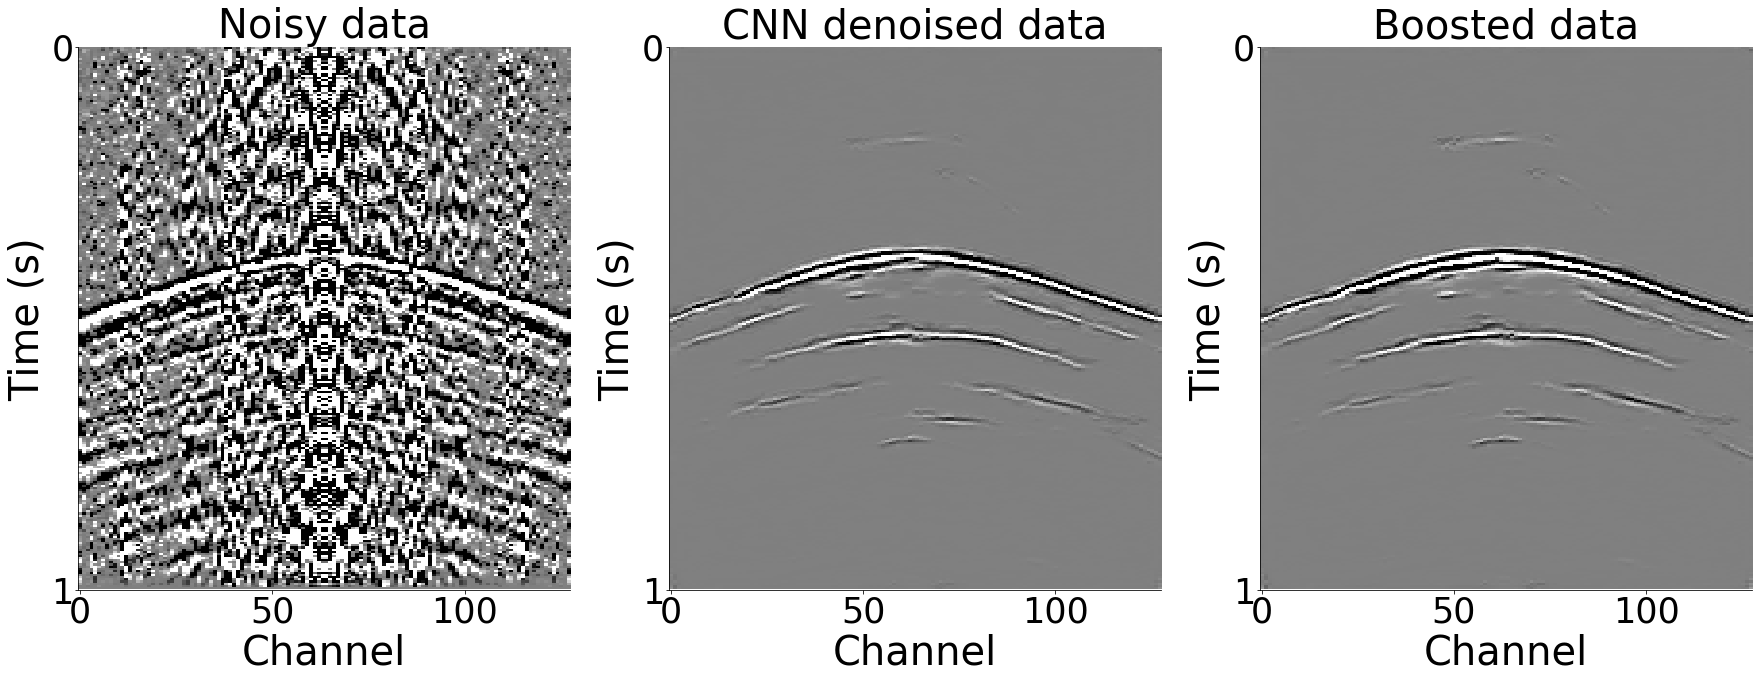

In [7]:
# show No.n example in this data set
n        = 19
# plot and save
img_rows = 256
img_cols = 128
v_min    = -np.max(np.abs(denoised_b))/5
v_max    = np.max(np.abs(denoised_b))/5
sr       = 0.004
ystr     = np.arange(int(sr*img_rows)+1)
y        = np.linspace(0, img_rows, int(sr*img_rows) + 1)

plt.subplots(figsize=(30,10))
ax=plt.subplot(1,3,1)
plt.imshow(noisy_b[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Noisy data', size = 40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1,3,2)
plt.imshow(denoised_b[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('CNN denoised data', size = 40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1,3,3)
plt.imshow(denoised_b_bst[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Boosted data', size = 40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#plt.savefig('../plot_img/rho{}_tau{}_boost_b_{}.png'.format(rho, tau, n), bbox_inches='tight', dpi=200)

## Apply SOS boosting to the network denoised data using manually tuned hyperparameters.

In [8]:
# apply SOS boosting
# use the manually tuned hyperparameters
rho = 1
tau = 0.7

print('rho =', rho)
print('tau =', tau)
print('SOS boosting started.')
denoised_b_bst_4d = denoised_b_4d

for i in range(10):
    
    denoised_b_bst_4d = fx.Boost(rho, tau, model, noisy_b_4d, denoised_b_bst_4d)
    
denoised_b_bst = np.reshape(denoised_b_bst_4d,(noisy_b.shape[0], noisy_b.shape[1], noisy_b.shape[2]))
print('SOS boosting finished.')

rho = 1
tau = 0.7
SOS boosting started.
SOS boosting finished.


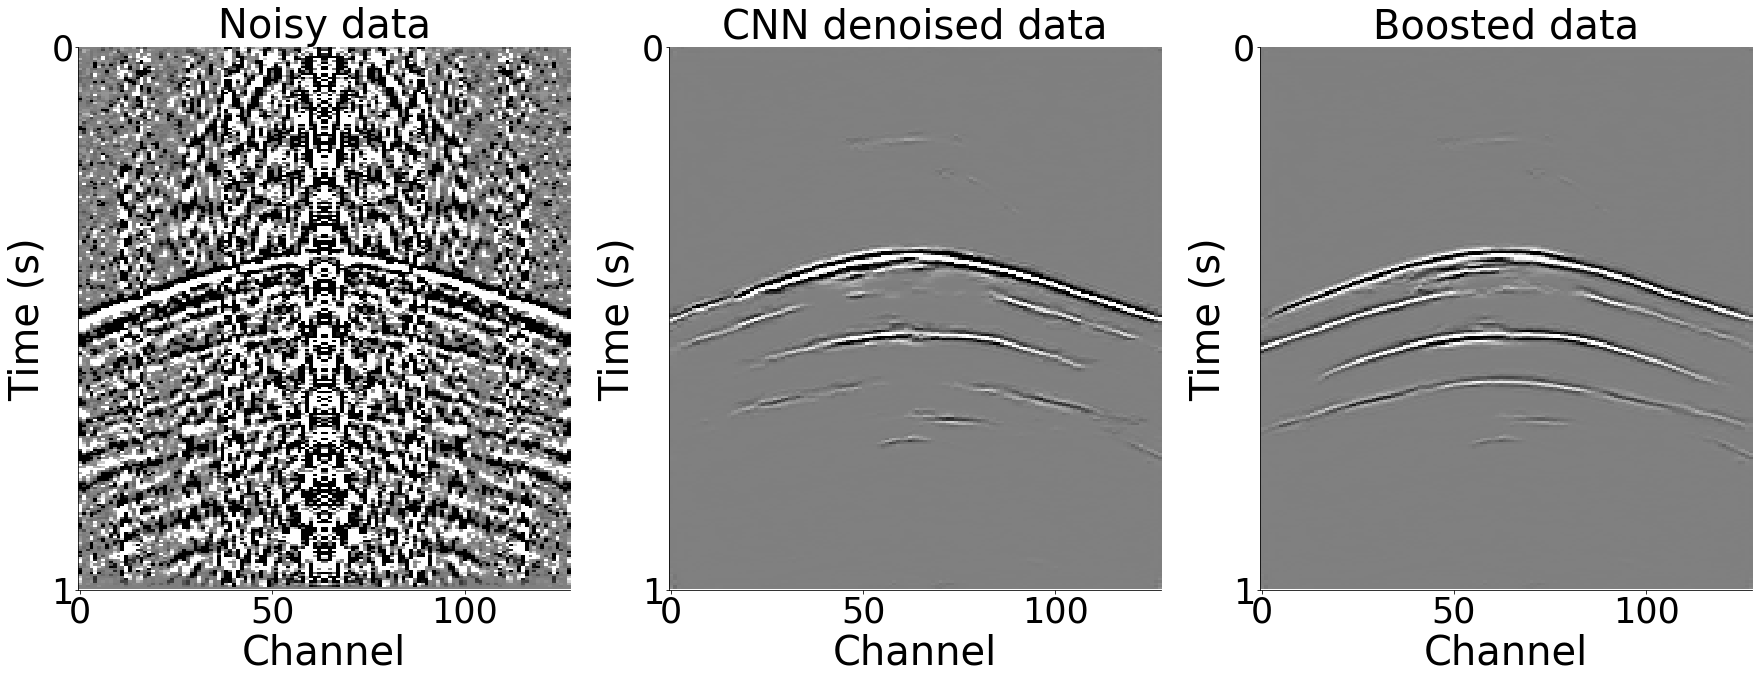

In [10]:
# show No.n example in this data set
n        = 19
# plot and save
img_rows = 256
img_cols = 128
v_min    = -np.max(np.abs(denoised_b))/5
v_max    = np.max(np.abs(denoised_b))/5
sr       = 0.004
ystr     = np.arange(int(sr*img_rows)+1)
y        = np.linspace(0, img_rows, int(sr*img_rows) + 1)

plt.subplots(figsize=(30,10))
ax=plt.subplot(1,3,1)
plt.imshow(noisy_b[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Noisy data', size = 40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1,3,2)
plt.imshow(denoised_b[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('CNN denoised data', size = 40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1,3,3)
plt.imshow(denoised_b_bst[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Boosted data', size = 40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#plt.savefig('../plot_img/rho{}_tau{}_boost_b_{}.png'.format(rho, tau, n), bbox_inches='tight', dpi=200)